In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import pylab
import scipy.stats as stats
from sklearn import preprocessing

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

In [2]:
# Read data from csv file and store in df. 
# I am using low_memory=False to avoid the deprecated low_memory option warning
listings = pd.read_csv('./Data/listings.csv', low_memory=False)

In [3]:
# Get some info about this data frame df
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44620 entries, 0 to 44619
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 36.1+ MB


So I have 106 columns and 44620 rows. I am going to create a copy of listings in df and start data wrangling process.

In [4]:
df = listings

# Display all columns to check which data I might need visually
pd.set_option('display.max_columns', None)
df.head(2)

id                       listing_url       scrape_id last_scraped  \
0  109  https://www.airbnb.com/rooms/109  20190708161040   2019-07-09   
1  344  https://www.airbnb.com/rooms/344  20190708161040   2019-07-09   

                                                name  \
0  Amazing bright elegant condo park front *UPGRA...   
1                  Family perfect;Pool;Near Studios!   

                                             summary  \
0  *** Unit upgraded with new bamboo flooring, br...   
1  This home is perfect for families; aspiring ch...   

                                               space  \
0  *** Unit upgraded with new bamboo flooring, br...   
1  Cheerful & comfortable; near studios, amusemen...   

                                         description experiences_offered  \
0  *** Unit upgraded with new bamboo flooring, br...                none   
1  This home is perfect for families; aspiring ch...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Quiet-yet-close to all the fun in LA! Hollywoo...   

                                               notes  \
0                                                NaN   
1  One dog may be on premises, friendly and cared...   

                                             transit  \
0                                                NaN   
1  Short drive to subway and elevated trains runn...   

                                              access  \
0                                                NaN   
1  Pool, patio and self-contained main house all ...   

                                         interaction  \
0                                                NaN   
1  Host and caretaker may be available throughout...   

                                         house_rules  thumbnail_url  \
0  Camelot NEW RESIDENTS’ GENERAL INFORMATION   F...            NaN   
1  Host asks that guests refrain from partying lo...            NaN   

   medium_url                                        picture_url  \
0         NaN  https://a0.muscache.com/im/pictures/4321499/1d...   
1         NaN  https://a0.muscache.com/im/pictures/cc4b724d-d...   

   xl_picture_url  host_id                               host_url host_name  \
0             NaN      521  https://www.airbnb.com/users/show/521     Paolo   
1             NaN      767  https://www.airbnb.com/users/show/767   Melissa   

   host_since                             host_location  \
0  2008-06-27  San Francisco, California, United States   
1  2008-07-11        Burbank, California, United States   

                                          host_about host_response_time  \
0  Search for me on the Internet with the keyword...                NaN   
1  Single mother, CEO and Owner of an internation...       within a day   

  host_response_rate  host_acceptance_rate host_is_superhost  \
0                NaN                   NaN                 f   
1                67%                   NaN                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/521/profile_p...   
1  https://a0.muscache.com/im/users/767/profile_p...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/521/profile_p...        Culver City   
1  https://a0.muscache.com/im/users/767/profile_p...            Burbank   

   host_listings_count  host_total_listings_count  \
0                  1.0                        1.0   
1                  1.0                        1.0   

                                  host_verifications host_has_profile_pic  \
0   ['email', 'phone', 'facebook', 'reviews', 'kba']                    t   
1  ['email', 'phone', 'reviews', 'jumio', 'kba', ...                    t   

  host_identity_verified                          street neighbourhood  \
0                      t  Culver City, CA, United States   Culver City   
1             

In [5]:
# Drop any duplicate data
df = df.drop_duplicates()

In [6]:
# Find columns with majority null values and delete those columns

def deleteNullValueCols(null_count):
    drop_cols = []
    for column in list(df):
        if (df[column].isnull().sum() > null_count):
            drop_cols.append(column)
    return df.drop(drop_cols, axis=1)

df = deleteNullValueCols(35000)
df.shape

(44620, 97)

In [7]:
# Find columns with majority none values and delete those columns

def deleteNoneValueCols(null_count):
    drop_cols = []
    for column in list(df):
        if ((df[column] == 'none').sum() > null_count):
            drop_cols.append(column)
    return df.drop(drop_cols, axis=1)

df = deleteNoneValueCols(35000)
df.shape

/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


(44620, 96)

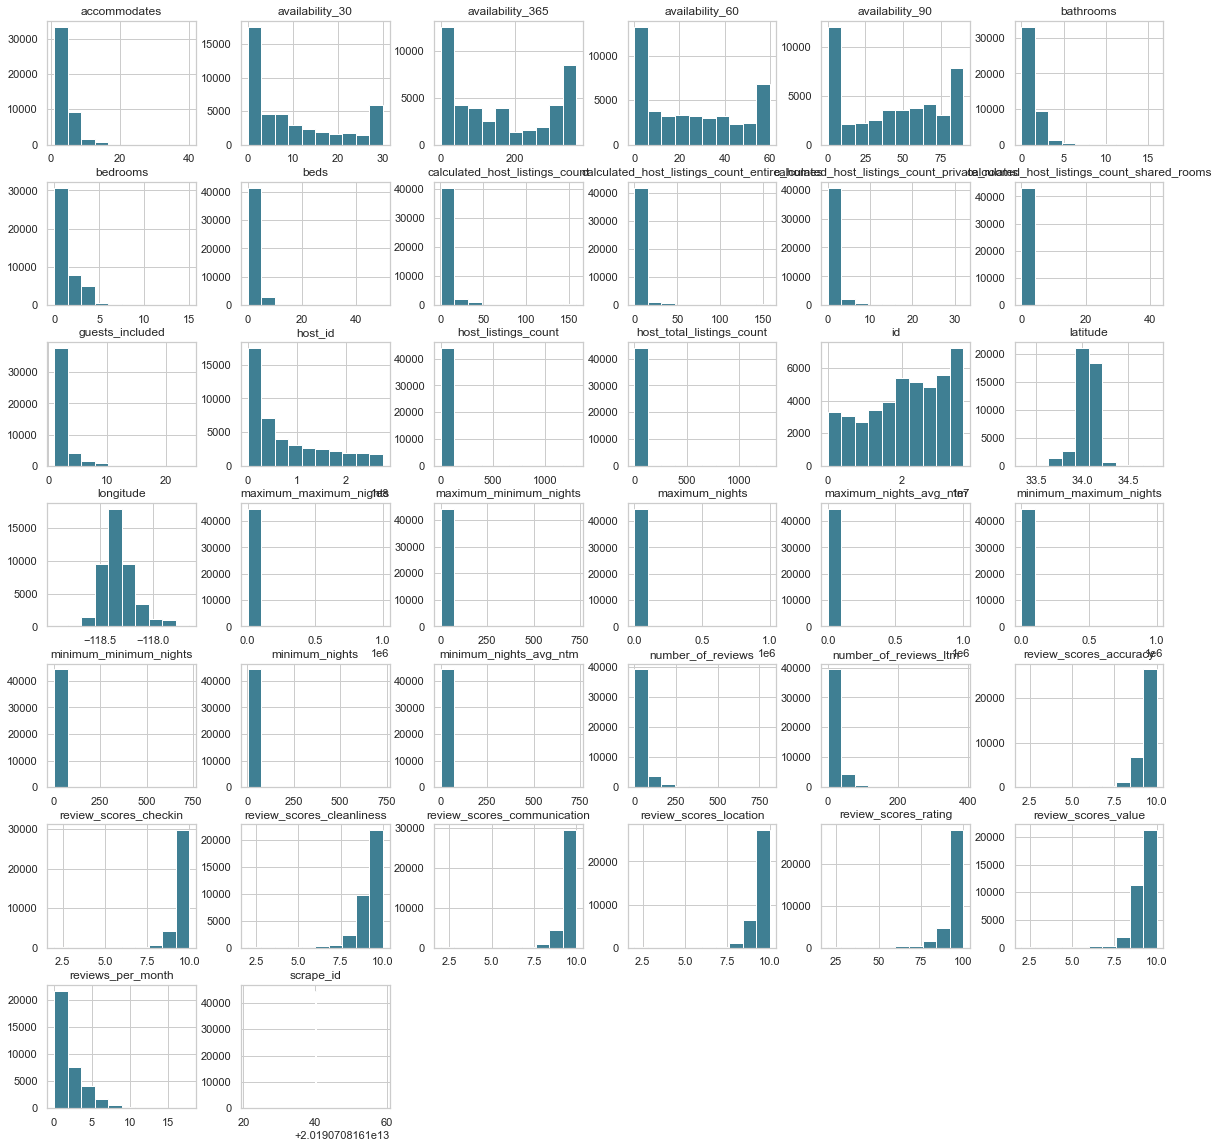

In [8]:
# Plot the distribution of numerical and boolean categories

df.hist(figsize=(20,20));

Histograms above show that some columns contain only one category and can be dropped.

In [9]:
delete_columns = ['host_listings_count','minimum_minimum_nights', 'maximum_minimum_nights',
                  'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm',
                  'maximum_nights_avg_ntm','host_total_listings_count','scrape_id']
df = df.drop(delete_columns, axis = 1)

Scrolling through df.head() data above shows that some of the columns are not required for predicting the price. So I will delete these columns

In [10]:
delete_columns = ['id','listing_url','name','summary','space','description','neighborhood_overview','notes',
                  'transit','access','interaction', 'house_rules', 'picture_url', 'host_id', 'host_url',
                  'host_name', 'host_location', 'host_about','host_is_superhost','host_thumbnail_url',
                  'host_picture_url', 'host_neighbourhood','host_verifications', 'host_has_profile_pic',
                  'host_identity_verified','street', 'neighbourhood','city', 'state','market', 'smart_location',
                  'country_code', 'country','is_location_exact','calendar_updated', 'has_availability',
                  'availability_30','availability_60', 'availability_90', 'availability_365','calendar_last_scraped',
                  'number_of_reviews_ltm','requires_license','jurisdiction_names','is_business_travel_ready',
                  'require_guest_profile_picture','require_guest_phone_verification', 
                  'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                  'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms', 
                  'reviews_per_month']
df = df.drop(delete_columns, axis = 1)
df.shape

(44620, 35)

'city', 'state','market', 'smart_location', 'country_code', 'country' columns were not required because data is only for one city.

'street', 'neighbourhood' columns were not required because 'neighbourhood_cleansed' is a better column to keep

In [11]:
# Make price the 1st column, followed by other money columns, then rest of the columns
all_columns = list(df.columns)
price_columns = ['price','security_deposit','cleaning_fee','extra_people','guests_included']
final_list = list(set(all_columns).difference(set(price_columns)))
df = df[['price','security_deposit','cleaning_fee','extra_people','guests_included'] +  final_list]
pd.set_option('display.max_columns', len(df.columns))
df.head()

price security_deposit cleaning_fee extra_people  guests_included  \
0  $122.00          $500.00      $240.00       $25.00                3   
1  $168.00            $0.00      $100.00        $0.00                6   
2   $79.00          $480.00       $89.00        $0.00                1   
3  $140.00              NaN      $100.00        $0.00                1   
4   $80.00          $100.00       $75.00       $25.00                1   

   latitude  maximum_nights  host_since  review_scores_rating  \
0  33.98209             730  2008-06-27                  80.0   
1  34.16562              14  2008-07-11                  93.0   
2  34.09768             366  2008-09-16                  98.0   
3  34.00475             180  2008-09-17                  96.0   
4  33.87619             730  2008-09-25                   NaN   

                                           amenities  accommodates  \
0  {TV,"Cable TV",Internet,Wifi,"Air conditioning...             6   
1  {TV,"Cable TV",Internet,Wifi,"Air conditioning...             6   
2  {Internet,Wifi,"Air conditioning","Wheelchair ...             1   
3  {Internet,Wifi,Kitchen,Heating,Washer,Dryer,"S...             1   
4  {TV,"Cable TV",Internet,Wifi,"Air conditioning...             2   

           cancellation_policy last_review instant_bookable  \
0  strict_14_with_grace_period  2016-05-15                f   
1                     flexible  2018-10-21                t   
2  strict_14_with_grace_period  2019-05-20                t   
3  strict_14_with_grace_period  2018-11-15                f   
4  strict_14_with_grace_period         NaN                f   

   review_scores_location  bedrooms last_scraped       bed_type  \
0                    10.0       2.0   2019-07-09       Real Bed   
1                    10.0       3.0   2019-07-09       Real Bed   
2                    10.0       1.0   2019-07-09       Real Bed   
3                    10.0       1.0   2019-07-09  Pull-out Sofa   
4                     NaN       1.0   2019-07-08       Real Bed   

  host_response_rate host_response_time  bathrooms zipcode  longitude  \
0                NaN                NaN        2.0   90230 -118.38494   
1                67%       within a day        1.0   91505 -118.33458   
2               100%     within an hour        1.5   90046 -118.34602   
3               100%     within an hour        1.0   90405 -118.48127   
4                NaN                NaN        1.0   90706 -118.11397   

   review_scores_value        room_type first_review  number_of_reviews  \
0                  8.0  Entire home/apt   2011-08-15                  2   
1                  9.0  Entire home/apt   2016-06-14                  6   
2                 10.0     Private room   2014-06-09                 20   
3                  9.0     Private room   2011-06-06                 18   
4                  NaN  Entire home/apt          NaN                  0   

  property_type  review_scores_checkin  review_scores_accuracy  \
0   Condominium                    6.0                    10.0   
1         House                   10.0                    10.0   
2     Apartment                   10.0                    10.0   
3     Apartment                   10.0                     9.0   
4     Apartment                    NaN                     NaN   

  neighbourhood_cleansed  beds  minimum_nights  review_scores_communication  \
0            Culver City   3.0              30                          8.0   
1                Burbank   3.0               2                         10.0   
2              Hollywood   1.0              28                         10.0   
3           Santa Monica   1.0               1                         10.0   
4             Bellflower   1.0               2                          NaN   

   review_scores_cleanliness  
0                       10.0  
1                       10.0  
2                       10.0  
3                        9.0  
4                        NaN

In [12]:
# Write function updateMoneyColumns() to set money columns as float data types (convert price from $1.00 to 1.00)
# so that calculations can be performed on those

def updateMoneyColumns(columns):
    for column in columns:
        df[column] = df[column].str.replace('$', '').str.replace(',', '').astype(float)

columnsList = ['price','security_deposit','cleaning_fee','extra_people']
updateMoneyColumns(columnsList)
pd.set_option('display.max_columns', len(df.columns))
df.describe()

price  security_deposit  cleaning_fee  extra_people  \
count  44620.000000      33828.000000  38693.000000  44620.000000   
mean     211.848364        435.397807     87.020986     15.652712   
std      578.938791       2283.192145     93.330991     26.984904   
min        0.000000          0.000000      0.000000      0.000000   
25%       70.000000          0.000000     30.000000      0.000000   
50%      110.000000        200.000000     65.000000     10.000000   
75%      186.000000        450.000000    100.000000     24.000000   
max    25000.000000     250000.000000   2500.000000    300.000000   

       guests_included      latitude  maximum_nights  review_scores_rating  \
count     44620.000000  44620.000000    44620.000000          35386.000000   
mean          1.966674     34.053387      660.576311             94.517860   
std           1.803867      0.117283     4816.943845              8.383653   
min           1.000000     33.338480        1.000000             20.000000   
25%           1.000000     34.008848       30.000000             93.000000   
50%           1.000000     34.063520     1125.000000             97.000000   
75%           2.000000     34.103572     1125.000000            100.000000   
max          24.000000     34.811190  1000000.000000            100.000000   

       accommodates  review_scores_location      bedrooms     bathrooms  \
count  44620.000000            35335.000000  44602.000000  44598.000000   
mean       3.681286                9.696675      1.432178      1.459382   
std        2.667868                0.708306      1.111760      0.969900   
min        1.000000                2.000000      0.000000      0.000000   
25%        2.000000               10.000000      1.000000      1.000000   
50%        3.000000               10.000000      1.000000      1.000000   
75%        5.000000               10.000000      2.000000      2.000000   
max       40.000000               10.000000     15.000000     16.000000   

          longitude  review_scores_value  number_of_reviews  \
count  44620.000000         35327.000000       44620.000000   
mean    -118.325818             9.463753          31.984603   
std        0.154067             0.893201          57.460077   
min     -118.934220             2.000000           0.000000   
25%     -118.424432             9.000000           1.000000   
50%     -118.343290            10.000000           8.000000   
75%     -118.261040            10.000000          36.000000   
max     -117.652640            10.000000         813.000000   

       review_scores_checkin  review_scores_accuracy          beds  \
count           35339.000000            35369.000000  44557.000000   
mean                9.764651                9.640024      1.986759   
std                 0.725528                0.836545      1.650724   
min                 2.000000                2.000000      0.000000   
25%                10.000000                9.000000      1.000000   
50%                10.000000               10.000000      1.000000   
75%                10.000000               10.000000      2.000000   
max                10.000000               10.000000     50.000000   

       minimum_nights  review_scores_communication  review_scores_cleanliness  
count    44620.000000                 35364.000000                35370.00000  
mean         5.879583                     9.755542                    9.44337  
std         17.644089                     0.736224                    0.95674  
min          1.000000                     2.000000                    2.00000  
25%          1.000000                    10.000000                    9.00000  
50%          2.000000                    10.000000                   10.00000  
75%          3.000000                    10.000000                   10.00000  
max        730.000000                    10.000000                   10.00000

Minimum price of 0.00 for a listing is not possible. It might be a mistake. I will delete all the rows from dataframe where listing price is 0.00

In [13]:
# Remove observations where price = 0
df = df[(df[['price']] != 0).all(axis=1)]
df.describe()

price  security_deposit  cleaning_fee  extra_people  \
count  44611.000000      33819.000000  38684.000000  44611.000000   
mean     211.891103        435.460451     87.021973     15.651924   
std      578.989368       2283.491381     93.337621     26.984319   
min       10.000000          0.000000      0.000000      0.000000   
25%       70.000000          0.000000     30.000000      0.000000   
50%      110.000000        200.000000     65.000000     10.000000   
75%      186.000000        450.000000    100.000000     24.000000   
max    25000.000000     250000.000000   2500.000000    300.000000   

       guests_included      latitude  maximum_nights  review_scores_rating  \
count     44611.000000  44611.000000    44611.000000          35378.000000   
mean          1.966398     34.053398      660.603080             94.516988   
std           1.803137      0.117282     4817.423356              8.384353   
min           1.000000     33.338480        1.000000             20.000000   
25%           1.000000     34.008880       30.000000             93.000000   
50%           1.000000     34.063550     1125.000000             97.000000   
75%           2.000000     34.103575     1125.000000            100.000000   
max          24.000000     34.811190  1000000.000000            100.000000   

       accommodates  review_scores_location      bedrooms     bathrooms  \
count  44611.000000            35327.000000  44593.000000  44589.000000   
mean       3.680998                9.696606      1.432041      1.459362   
std        2.667627                0.708371      1.111600      0.969931   
min        1.000000                2.000000      0.000000      0.000000   
25%        2.000000               10.000000      1.000000      1.000000   
50%        3.000000               10.000000      1.000000      1.000000   
75%        5.000000               10.000000      2.000000      2.000000   
max       40.000000               10.000000     15.000000     16.000000   

          longitude  review_scores_value  number_of_reviews  \
count  44611.000000         35319.000000       44611.000000   
mean    -118.325815             9.463660          31.984062   
std        0.154062             0.893266          57.461509   
min     -118.934220             2.000000           0.000000   
25%     -118.424415             9.000000           1.000000   
50%     -118.343280            10.000000           8.000000   
75%     -118.261040            10.000000          36.000000   
max     -117.652640            10.000000         813.000000   

       review_scores_checkin  review_scores_accuracy          beds  \
count           35331.000000            35361.000000  44548.000000   
mean                9.764598                9.639971      1.986644   
std                 0.725602                0.836617      1.650570   
min                 2.000000                2.000000      0.000000   
25%                10.000000                9.000000      1.000000   
50%                10.000000               10.000000      1.000000   
75%                10.000000               10.000000      2.000000   
max                10.000000               10.000000     50.000000   

       minimum_nights  review_scores_communication  review_scores_cleanliness  
count    44611.000000                 35356.000000               35362.000000  
mean         5.880478                     9.755515                   9.443301  
std         17.645754                     0.736288                   0.956815  
min          1.000000                     2.000000                   2.000000  
25%          1.000000                    10.000000                   9.000000  
50%          2.000000                    10.000000                  10.000000  
75%          3.000000                    10.000000                  10.000000  
max        730.000000                    10.000000                  10.000000

Text(0, 0.5, 'Frequency')

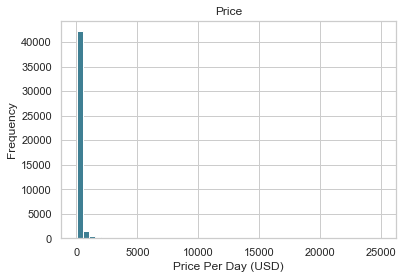

In [14]:
# Visualize distribution of price (target variable)
plt.hist(df['price'], bins=50)
plt.title("Price")
plt.xlabel("Price Per Day (USD)")
plt.ylabel("Frequency")

Above histogram shows that the distribution of 'price' is strongly skewed to the right. To compensate for the skewed right distribution, I will calculate natural log of price variable and store results in a new column. Then I will run the baseline models on both (original price and logged price) and compare the results. 

Text(0, 0.5, 'Frequency')

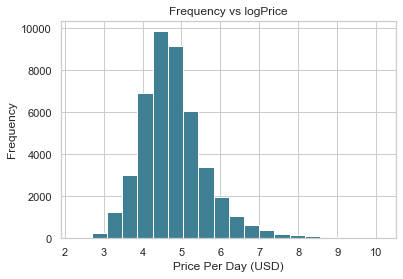

In [15]:
# log transform the response 'price'
df['logPrice'] = df['price'].apply(lambda x: math.log(x))

# Visualize distribution of logPrice
plt.hist(df['logPrice'], bins=20)
plt.title("Frequency vs logPrice")
plt.xlabel("Price Per Day (USD)")
plt.ylabel("Frequency")

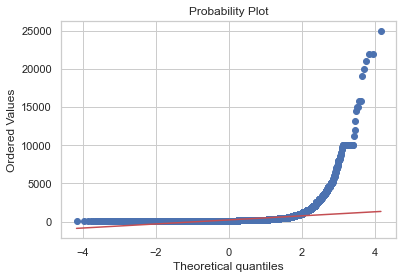

In [16]:
# Before transformation price distribution
stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

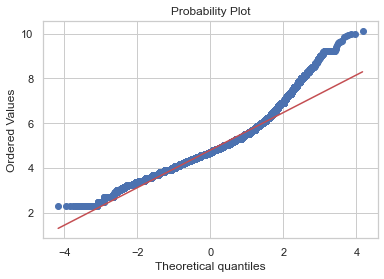

In [17]:
# After transformation price distribution
stats.probplot(df['logPrice'], dist="norm", plot=pylab)
pylab.show()

After transformation, the distribution for price resembles that of a normal distribution. This normality validation is important in order to fit the assumptions of linear regression models.

In [18]:
# Find how many columns have 'object' data(mixed data types). 
print(sum(df.dtypes == 'object'))
df.info()

14
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44611 entries, 0 to 44619
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        44611 non-null  float64
 1   security_deposit             33819 non-null  float64
 2   cleaning_fee                 38684 non-null  float64
 3   extra_people                 44611 non-null  float64
 4   guests_included              44611 non-null  int64  
 5   latitude                     44611 non-null  float64
 6   maximum_nights               44611 non-null  int64  
 7   host_since                   44597 non-null  object 
 8   review_scores_rating         35378 non-null  float64
 9   amenities                    44611 non-null  object 
 10  accommodates                 44611 non-null  int64  
 11  cancellation_policy          44611 non-null  object 
 12  last_review                  35951 non-null  object 
 13  instant_booka

'last_review','first_review','instant_bookable','property_type','last_scraped','neighbourhood_cleansed','zipcode',
'host_response_time','host_response_rate','cancellation_policy','bed_type','amenities','room_type','host_since' columns need to be fixed.

# Fix Data Types

In [20]:
# Parse categorical data columns using sklearn LabelEncoder 
categorical_columns = ['zipcode','cancellation_policy','host_response_time','neighbourhood_cleansed',
                       'property_type','room_type','bed_type']

for col in categorical_columns:
    label_encoder = preprocessing.LabelEncoder()
    df[col] = df[col].astype(str)
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

    # Save the label encoder in case it needs to be reversed
    np.save('./Label Encoder/' + col + '.npy', label_encoder.classes_)

In [21]:
# Fix host_response_rate
df['host_response_rate'] = df['host_response_rate'].str.replace('%','').astype(float)

In [22]:
# Fix 
boolean_dict = {'t': True,'f': False }
df['instant_bookable'] = df['instant_bookable'].map(boolean_dict).astype(bool)

In [23]:
# Parse datas into datetime objs & tranform them to numeric numbers

date_columns = ['last_scraped', 'host_since', 'first_review', 'last_review']

for col in date_columns:
    df[col] = pd.to_datetime(df[col])
    
date_columns_transformed = ['host_since', 'first_review', 'last_review']
for col in date_columns_transformed:
    df[col + '_delta'] = (df['last_scraped'] - df[col]) / np.timedelta64(1, 'D')
    df = df.drop(col, axis=1)

df = df.drop(['last_scraped'], axis=1)

In [24]:
# Fix amenities columns
amenities_list = list(df['amenities'])
amenities_str = " ".join(amenities_list)
amenities_str = amenities_str.replace('{','')
amenities_str = amenities_str.replace('}','')
amenities_str = amenities_str.replace('"','')
amenities_str = amenities_str.replace('(','')
amenities_str = amenities_str.replace(')','')
amenities_set = [x.strip() for x in amenities_str.split(',')]
amenities_set = set(amenities_set)
print(len(amenities_set))
amenities_set

911


{'24-hour check-in',
 '24-hour check-in  TV',
 '24-hour check-in Internet',
 '24-hour check-in Pool',
 '24-hour check-in TV',
 '24-hour check-in Wifi',
 'Accessible-height bed',
 'Accessible-height bed Internet',
 'Accessible-height bed TV',
 'Accessible-height bed Wifi',
 'Accessible-height toilet',
 'Accessible-height toilet Internet',
 'Accessible-height toilet TV',
 'Accessible-height toilet Wifi',
 'Air conditioning',
 'Air conditioning TV',
 'Air hockey table',
 'Air purifier',
 'Air purifier TV',
 'Air purifier Wifi',
 'Alarm system',
 'Alfresco bathtub',
 'Alfresco shower',
 'Amazon Echo',
 'Apple TV',
 'BBQ grill',
 'BBQ grill Internet',
 'BBQ grill TV',
 'BBQ grill Wifi',
 'Baby bath',
 'Baby equipment',
 'Baby monitor',
 'Babysitter recommendations',
 'Babysitter recommendations TV',
 'Balcony',
 'Bar',
 'Basketball court TV',
 'Basketball court Wifi',
 'Bath towel',
 'Bathroom essentials',
 'Bathroom essentials  Internet',
 'Bathroom essentials  TV',
 'Bathroom essentials A

In [25]:
# In the list above, some amenities are more important than others. 
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Charcoal barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Refrigerator'), 'refrigerator'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/Users/gurpreetkaur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [26]:
# Replacing nulls with zeros for new columns
replace_nulls_columns = df.iloc[:,29:].columns
df[replace_nulls_columns] = df[replace_nulls_columns].fillna(0)

# Produces list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,29:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'nature_and_views', 'smoking_allowed', 'accessible', 'event_suitable']


In [27]:
# Fix latitude & longitude using binning
step = 0.1
to_bin = lambda x: np.floor(x / step) * step
df['latitude_bin'] = df['latitude'].map(to_bin)
df['longitude_bin'] = df['longitude'].map(to_bin)
df = df.drop(['latitude', 'longitude'], axis=1)

In [29]:
df.columns

Index(['price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'guests_included', 'maximum_nights', 'review_scores_rating',
       'accommodates', 'cancellation_policy', 'instant_bookable',
       'review_scores_location', 'bedrooms', 'bed_type', 'host_response_rate',
       'host_response_time', 'bathrooms', 'zipcode', 'review_scores_value',
       'room_type', 'number_of_reviews', 'property_type',
       'review_scores_checkin', 'review_scores_accuracy',
       'neighbourhood_cleansed', 'beds', 'minimum_nights',
       'review_scores_communication', 'review_scores_cleanliness', 'logPrice',
       'host_since_delta', 'first_review_delta', 'last_review_delta',
       'check_in_24h', 'air_conditioning', 'bbq', 'balcony', 'bed_linen',
       'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
       'elevator', 'gym', 'child_friendly', 'parking', 'outdoor_space',
       'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
       'pets_all

In [32]:
data_groups = df.groupby(['latitude_bin', 'longitude_bin'])
bin_dict = {}
for i, key in enumerate(data_groups.groups.keys()):
    bin_dict[key] = i

df['latitude_longitude_bin'] = df.apply(lambda x: bin_dict[(x['latitude_bin'], x['longitude_bin'])], axis = 1)
df = df.drop(['latitude_bin', 'longitude_bin'], axis=1)

# Fix Missing Values

In [33]:
df.isna().sum()

price                              0
security_deposit               10792
cleaning_fee                    5927
extra_people                       0
guests_included                    0
maximum_nights                     0
review_scores_rating            9233
accommodates                       0
cancellation_policy                0
instant_bookable                   0
review_scores_location          9284
bedrooms                          18
bed_type                           0
host_response_rate              7981
host_response_time                 0
bathrooms                         22
zipcode                            0
review_scores_value             9292
room_type                          0
number_of_reviews                  0
property_type                      0
review_scores_checkin           9280
review_scores_accuracy          9250
neighbourhood_cleansed             0
beds                              63
minimum_nights                     0
review_scores_communication        0
r

In [34]:
# Remove observations where bathrooms = 0, bedrooms = 0, beds = 0, host_since_delta = 0
df['bathrooms'] = df['bathrooms'].fillna(0)
df = df[(df[['bathrooms']] != 0).all(axis=1)]

df['bedrooms'] = df['bedrooms'].fillna(0)
df = df[(df[['bedrooms']] != 0).all(axis=1)]

df['beds'] = df['beds'].fillna(0)
df = df[(df[['beds']] != 0).all(axis=1)]

df['host_since_delta'] = df['host_since_delta'].fillna(0)
df = df[(df[['host_since_delta']] != 0).all(axis=1)]

# Display dataframe head
pd.set_option('display.max_columns', len(df.columns))
df.head()

price  security_deposit  cleaning_fee  extra_people  guests_included  \
0  122.0             500.0         240.0          25.0                3   
1  168.0               0.0         100.0           0.0                6   
2   79.0             480.0          89.0           0.0                1   
3  140.0               NaN         100.0           0.0                1   
4   80.0             100.0          75.0          25.0                1   

   maximum_nights  review_scores_rating  accommodates  cancellation_policy  \
0             730                  80.0             6                    6   
1              14                  93.0             6                    0   
2             366                  98.0             1                    6   
3             180                  96.0             1                    6   
4             730                   NaN             2                    6   

   instant_bookable  review_scores_location  bedrooms  bed_type  \
0             False                    10.0       2.0         4   
1              True                    10.0       3.0         4   
2              True                    10.0       1.0         4   
3             False                    10.0       1.0         3   
4             False                     NaN       1.0         4   

   host_response_rate  host_response_time  bathrooms  zipcode  \
0                 NaN                   1        2.0      298   
1                67.0                   2        1.0      161   
2               100.0                   4        1.5      267   
3               100.0                   4        1.0       27   
4                 NaN                   1        1.0       49   

   review_scores_value  room_type  number_of_reviews  property_type  \
0                  8.0          0                  2             15   
1                  9.0          0                  6             25   
2                 10.0          1                 20              1   
3                  9.0          1                 18              1   
4                  NaN          0                  0              1   

   review_scores_checkin  review_scores_accuracy  neighbourhood_cleansed  \
0                    6.0                    10.0                      53   
1                   10.0                    10.0                      31   
2                   10.0                    10.0                      99   
3                   10.0                     9.0                     192   
4                    NaN                     NaN                      22   

   beds  minimum_nights  review_scores_communication  \
0   3.0              30                          8.0   
1   3.0               2                         10.0   
2   1.0              28                         10.0   
3   1.0               1                         10.0   
4   1.0               2                          0.0   

   review_scores_cleanliness  logPrice  host_since_delta  first_review_delta  \
0                       10.0  4.804021            4029.0              2885.0   
1                       10.0  5.123964            4015.0              1120.0   
2                       10.0  4.369448            3948.0              1856.0   
3                        9.0  4.941642            3947.0              2955.0   
4                        0.0  4.382027            3938.0                 0.0   

   last_review_delta  check_in_24h  air_conditioning  bbq  balcony  bed_linen  \
0             1150.0           1.0               1.0  0.0      0.0        0.0   
1              261.0           1.0               1.0  1.0      1.0        0.0   
2               50.0           1.0               1.0  0.0      1.0        1.0   
3              236.0           0.0               0.0  0.0      0.0        0.0   
4                0.0           0.0               1.0  0.0      0.0        0.0   

   breakfast   tv  coffee_machine  cooking_basics  white_goods  elevator  gym  \
0        0.0  1.0  

In [35]:
# All review columns have missing values. I will create a new column 'has_review' which hold True value 
# when all the review-related data are present otherwise False
review_columns = ['first_review_delta', 'last_review_delta','review_scores_rating', 'review_scores_cleanliness', 'review_scores_accuracy',
                       'review_scores_checkin', 'review_scores_location', 'review_scores_value',
                       'review_scores_communication']

df['has_review'] = True
for col in review_columns:
    df['has_review'] = df['has_review'] & df[col].notnull()

df = df.drop(review_columns, axis=1)

# Draw plots

In [36]:
# Define function for plotting subplots
def create_sub_plots(total_cols, cols):
    rows = int(total_cols / cols)
    if total_cols % cols != 0:
        rows += 1
        
    figsize = (10 * cols, 10 * rows)
        
    fig, axes = plt.subplots(nrows = rows,ncols = cols,figsize = figsize,squeeze = False)
    
    if total_cols % cols != 0:
        for col in range(total_cols % cols, cols):
            fig.delaxes(axes[rows - 1][col])

    axes = axes.flatten()        

    return (fig, axes)

In [37]:
# define function for plotting scatter plot in each subplot
def scatter_plot_in_sub_plot(df_x, df_y, cols = 3, label_font_size = 28, tick_font_size = 25):
    total_cols = len(df_x.columns)
    fig, axes = create_sub_plots(total_cols, cols)
    
    for i, col in enumerate(df_x):
        sns.regplot(x = df_x[col], y = df_y, ax=axes[i])
        axes[i].tick_params(labelsize = tick_font_size)
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize = label_font_size)
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize = label_font_size)
                
    fig.tight_layout()    
    plt.show()

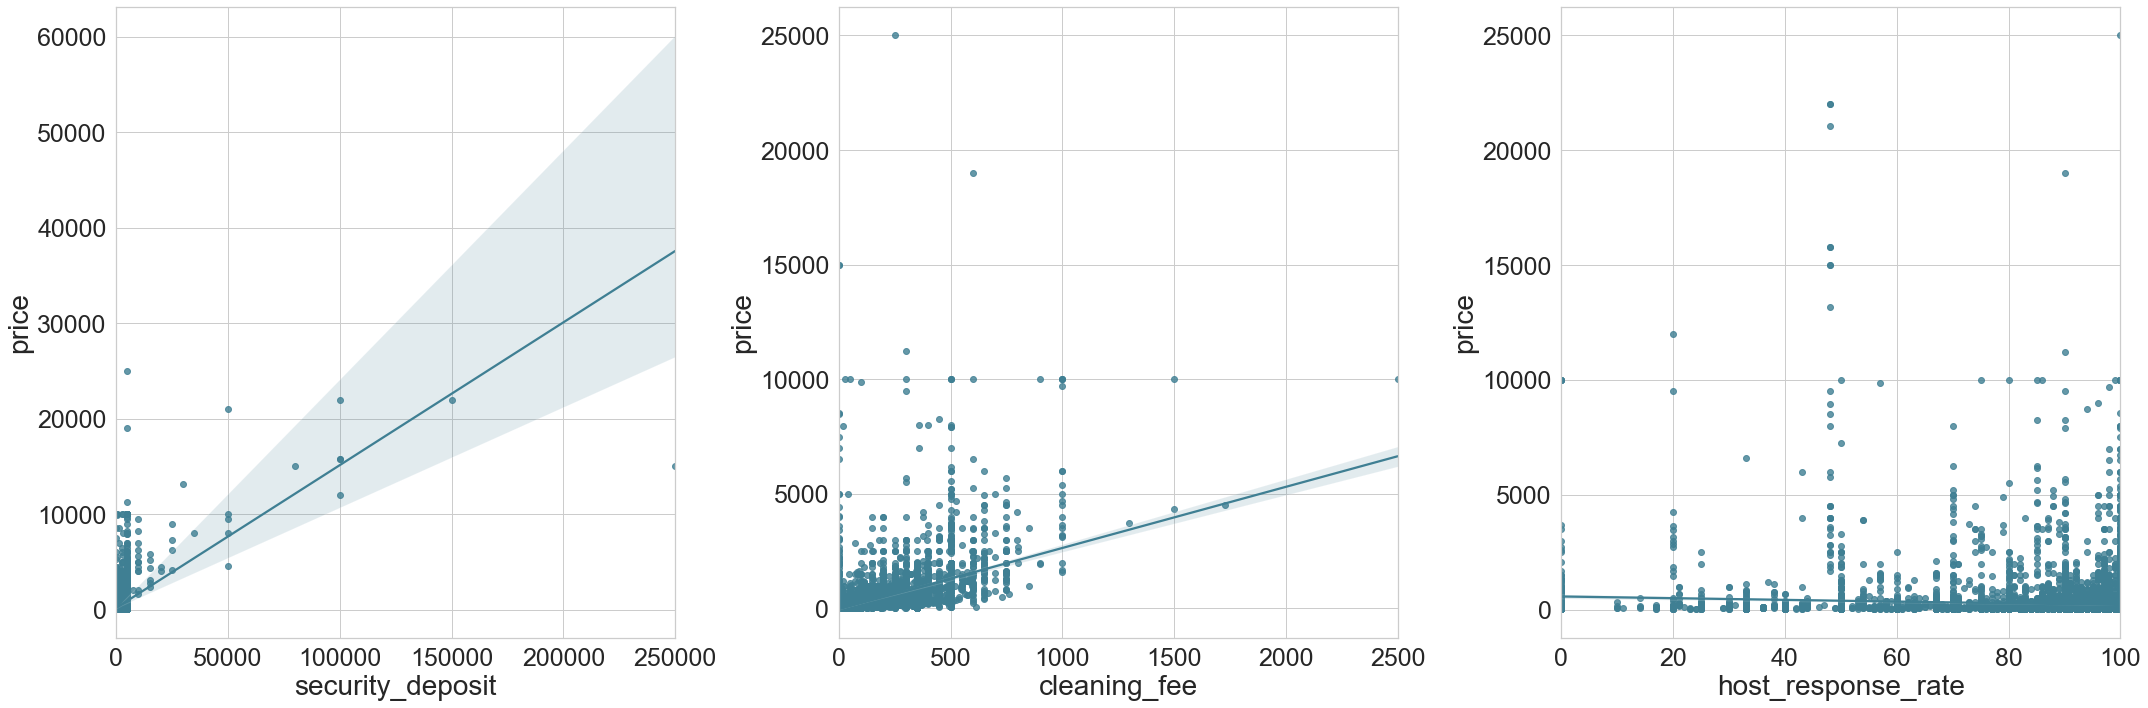

In [38]:
null_columns = df.columns[df.isnull().any()].tolist()

scatter_plot_in_sub_plot(df[null_columns], df['price'], cols = 3)

In [39]:
# Plots above show that these features are either linear or random to price. These can be fixed with mean.
for col in null_columns:
    df[col] = df[col].fillna(df[col].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38974 entries, 0 to 44619
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   38974 non-null  float64
 1   security_deposit        38974 non-null  float64
 2   cleaning_fee            38974 non-null  float64
 3   extra_people            38974 non-null  float64
 4   guests_included         38974 non-null  int64  
 5   maximum_nights          38974 non-null  int64  
 6   accommodates            38974 non-null  int64  
 7   cancellation_policy     38974 non-null  int64  
 8   instant_bookable        38974 non-null  bool   
 9   bedrooms                38974 non-null  float64
 10  bed_type                38974 non-null  int64  
 11  host_response_rate      38974 non-null  float64
 12  host_response_time      38974 non-null  int64  
 13  bathrooms               38974 non-null  float64
 14  zipcode                 38974 non-null

In [40]:
# Define functions for plotting box plots and dist plots together
def box_plots_and_dist_plots(df_col, axes):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.15, .85)})
    sns.boxplot(df_col, ax = ax_box)
    sns.distplot(df_col, ax = ax_hist)
    ax_box.set(xlabel='')
    plt.show()

In [41]:
# Define function for plotting boxplot plot in each subplot
def box_plot_in_sub_plot(df_x, cols = 3, label_font_size = 28, tick_font_size = 25):
    total_cols = len(df_x.columns)
    fig, axes = create_sub_plots(total_cols, cols)
    
    for i, col in enumerate(df_x):
        sns.boxplot(df_x[col], orient = 'v', ax = axes[i])
        axes[i].tick_params(labelsize = tick_font_size)
        axes[i].set_xlabel(axes[i].get_ylabel(), fontsize = label_font_size)
        axes[i].set_ylabel('values', fontsize = label_font_size)
                
    fig.tight_layout()    
    plt.show()

In [42]:
# Update categorical_columns first
for col in categorical_columns:
    if col not in df.columns:
        categorical_columns.remove(col)

cols = df.select_dtypes(exclude=[bool]).columns.values.tolist()
for col in cols:
    if col in categorical_columns:
        cols.remove(col)

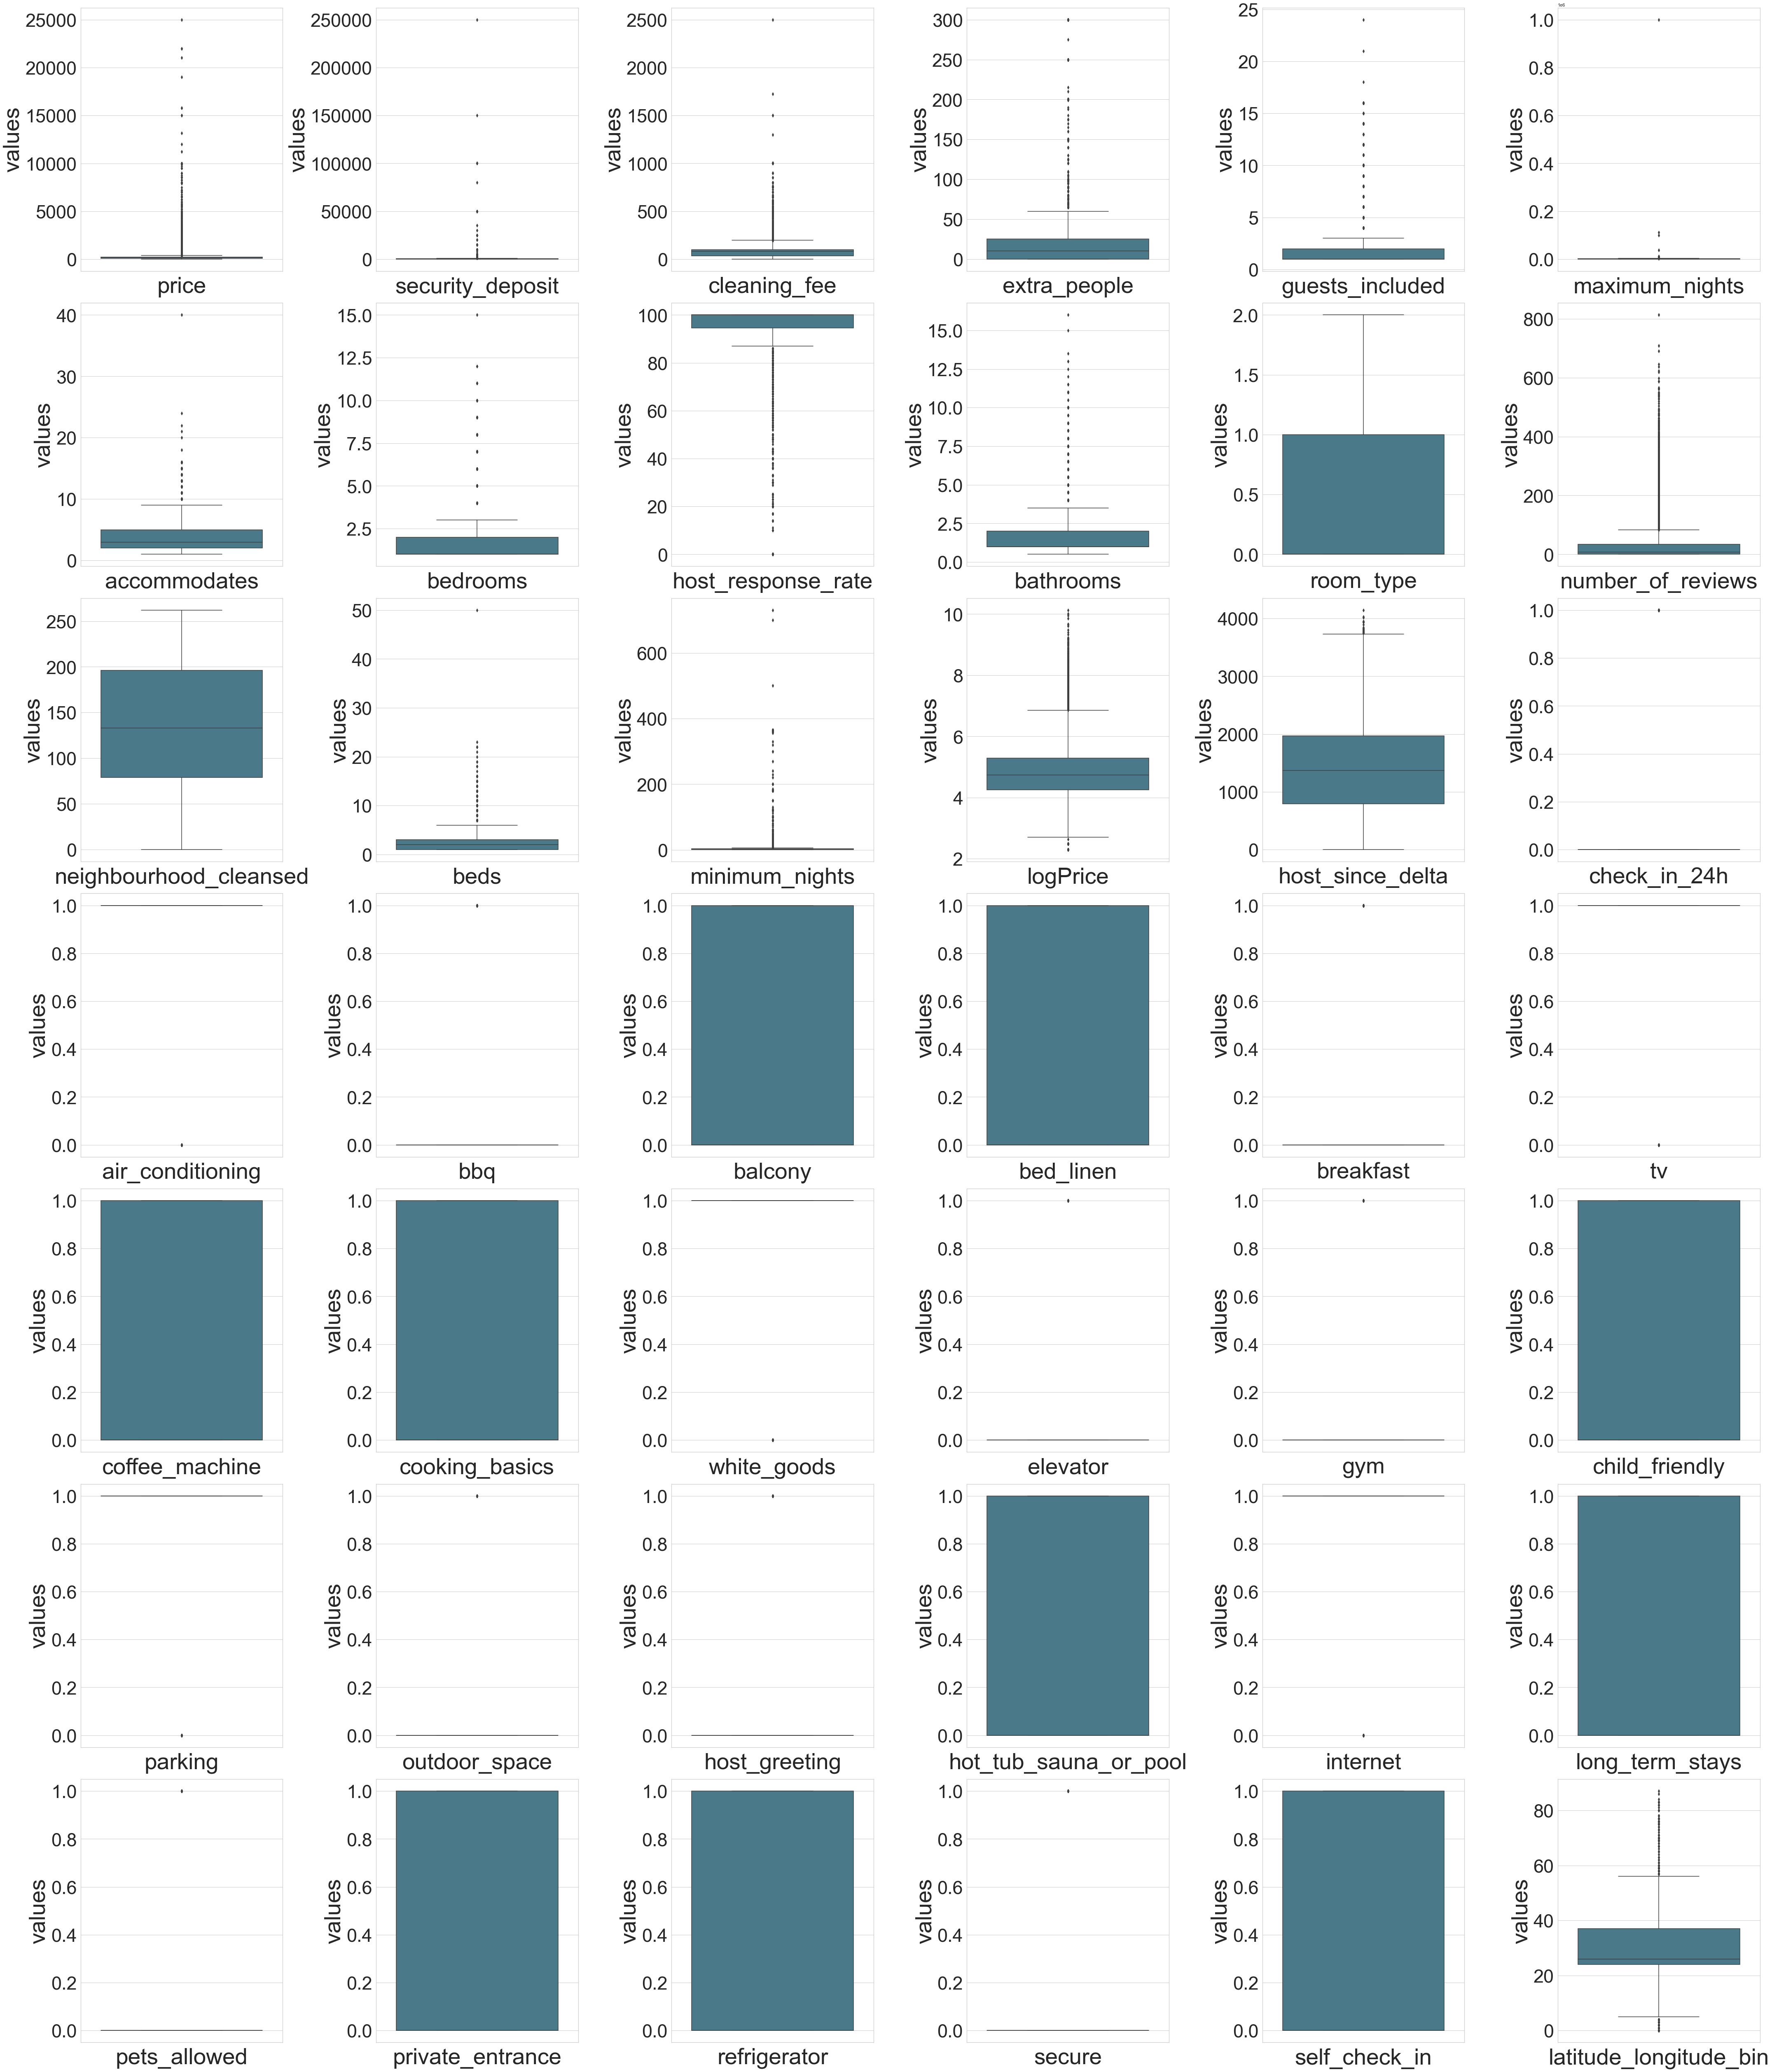

In [43]:
box_plot_in_sub_plot(df[cols], cols = 6, label_font_size = 55, tick_font_size = 45)

In [44]:
# Define function for plotting countplot in each subplot
def count_plot_in_sub_plot(df, cols = 5, label_font_size = 28, tick_font_size = 25):
    total_cols = len(df.columns)
    fig, axes = create_sub_plots(total_cols, cols)
        
    for i, col in enumerate(df):
        sns.countplot(x = col, data = df, ax = axes[i])
        axes[i].tick_params(labelsize = tick_font_size)
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize = label_font_size)
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize = label_font_size)
            
    fig.tight_layout()    
    plt.show()

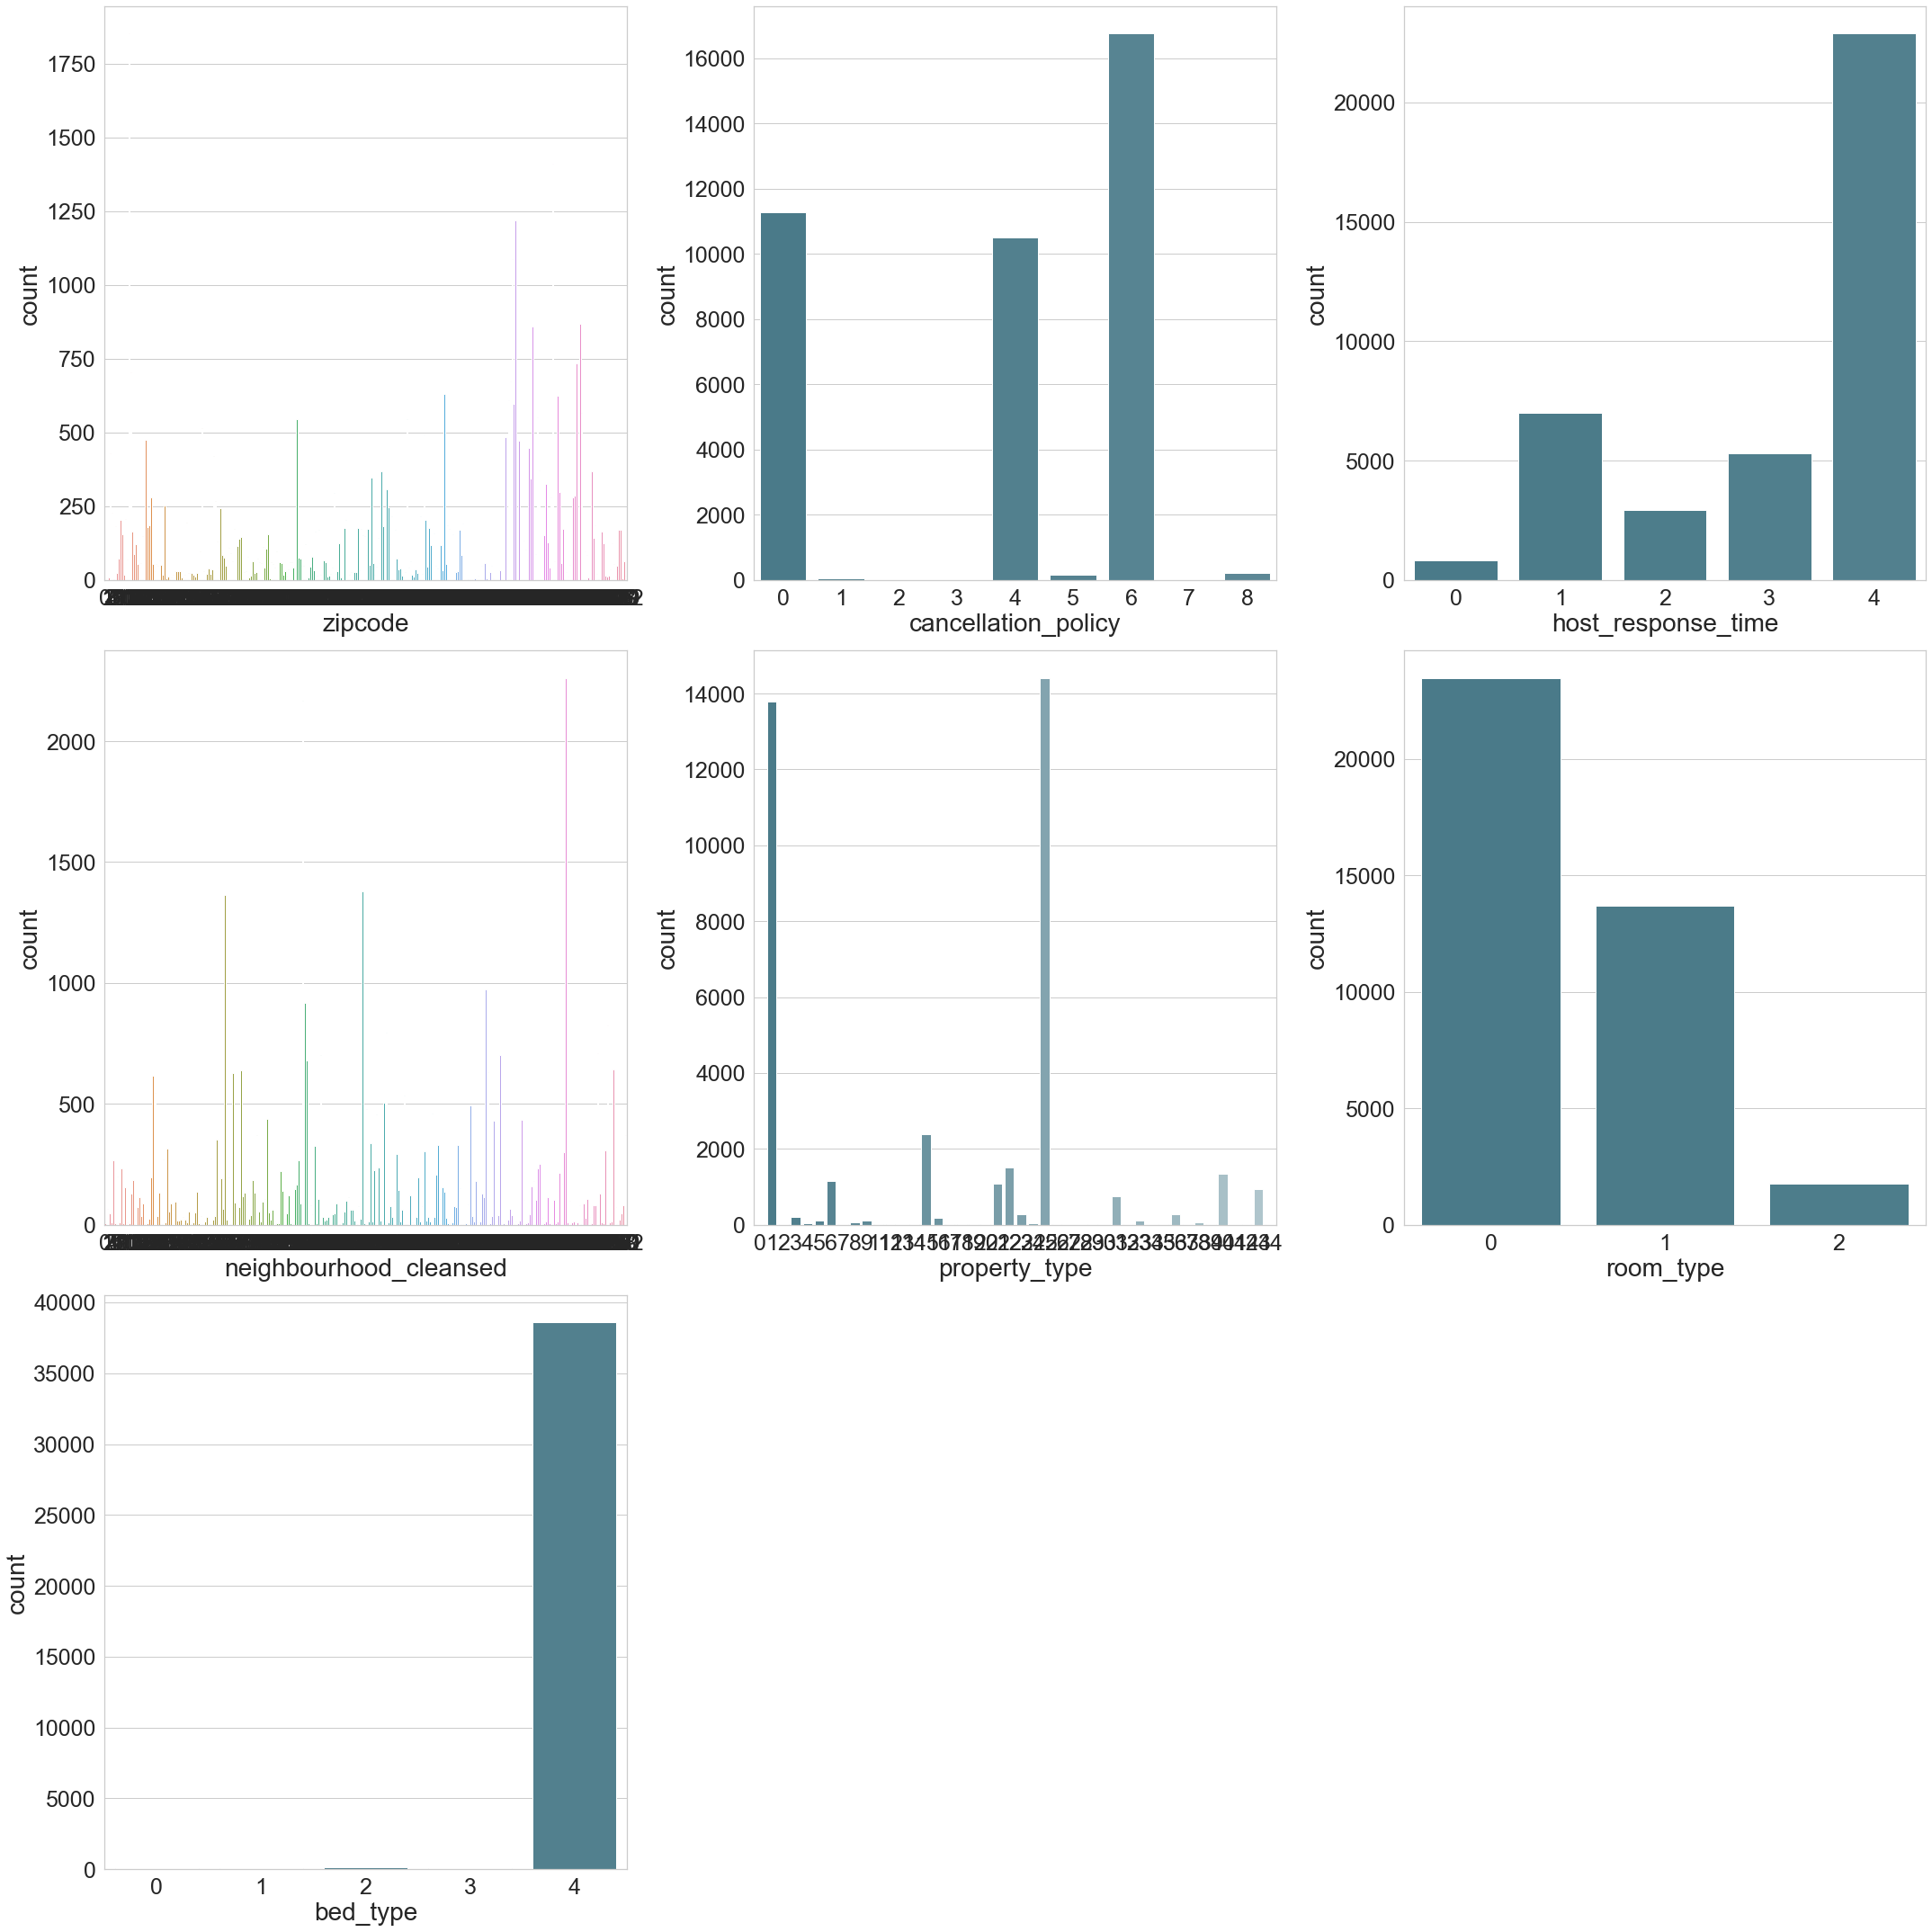

In [45]:
# Plot bar chart for category data
count_plot_in_sub_plot(df[categorical_columns], cols = 3)

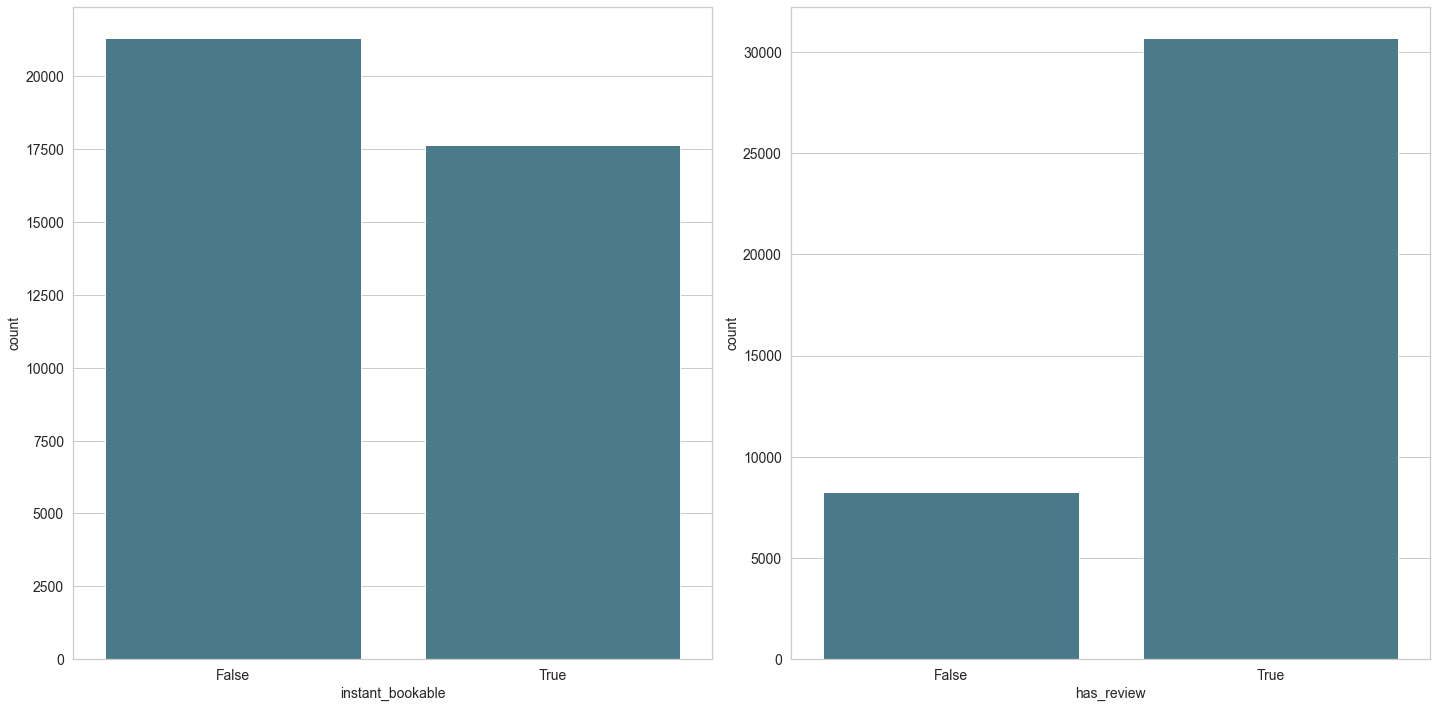

In [46]:
# Plot bar chart for boolean data
count_plot_in_sub_plot(df.select_dtypes(include=[bool]), cols = 6,
                           label_font_size = 14, tick_font_size = 14)

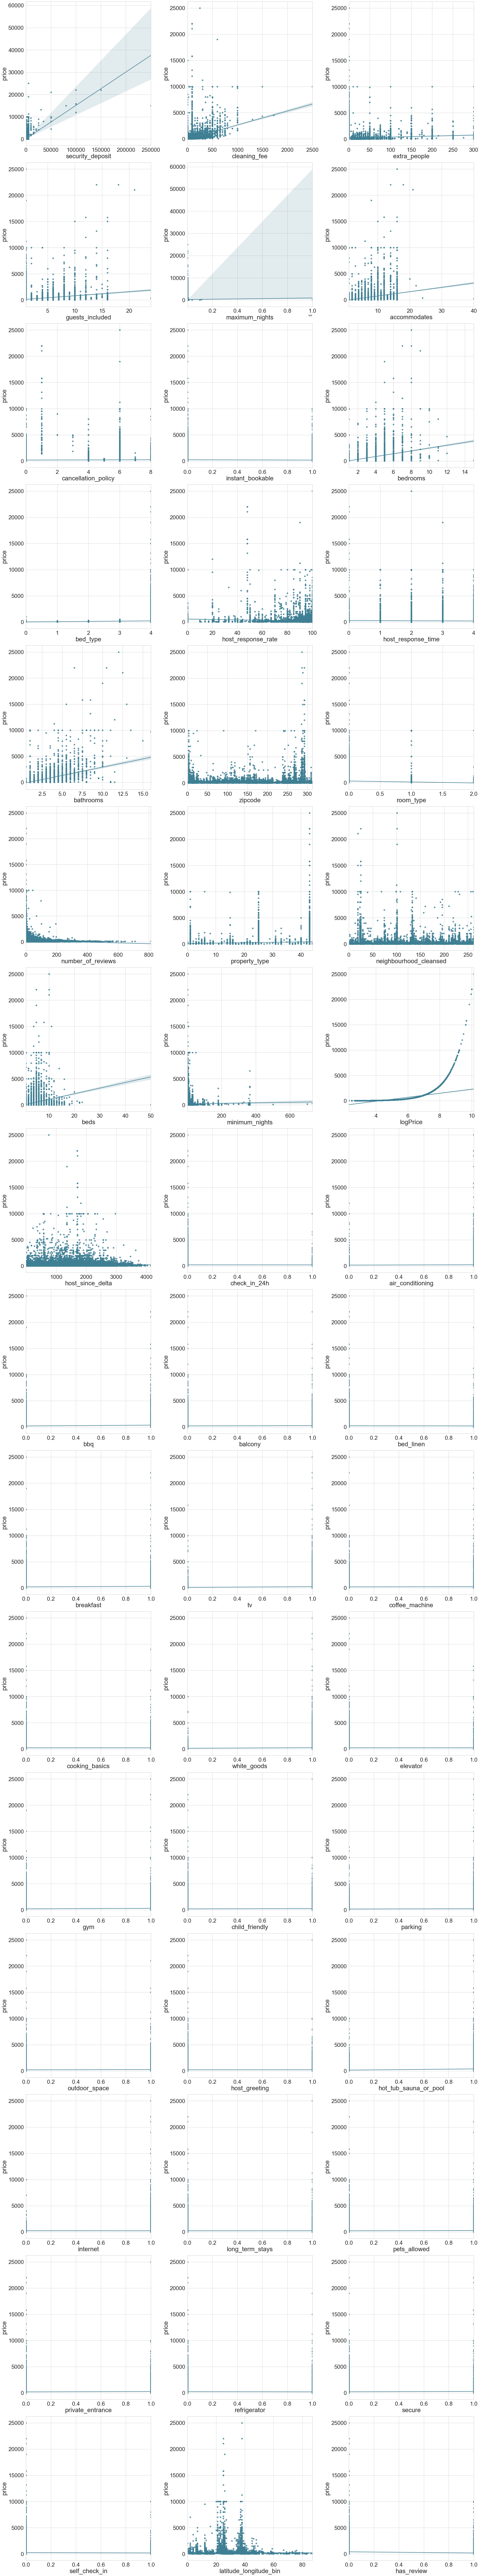

In [47]:
# Plot scatter plot of columns vs. price again
all_columns = df.columns.values.tolist()
all_columns.remove('price')

scatter_plot_in_sub_plot(df[all_columns], df['price'], cols = 3)

In [48]:
# After checking at all above plots, it looks like I can drop few more columns. 
# Print all columns
df.columns

Index(['price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'guests_included', 'maximum_nights', 'accommodates',
       'cancellation_policy', 'instant_bookable', 'bedrooms', 'bed_type',
       'host_response_rate', 'host_response_time', 'bathrooms', 'zipcode',
       'room_type', 'number_of_reviews', 'property_type',
       'neighbourhood_cleansed', 'beds', 'minimum_nights', 'logPrice',
       'host_since_delta', 'check_in_24h', 'air_conditioning', 'bbq',
       'balcony', 'bed_linen', 'breakfast', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'gym', 'child_friendly',
       'parking', 'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool',
       'internet', 'long_term_stays', 'pets_allowed', 'private_entrance',
       'refrigerator', 'secure', 'self_check_in', 'latitude_longitude_bin',
       'has_review'],
      dtype='object')

In [49]:
delete_columns = ['extra_people','instant_bookable','host_response_time','host_response_rate','minimum_nights',
                  'host_since_delta','has_review',]
df = df.drop(delete_columns, axis=1)
df.columns

Index(['price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'maximum_nights', 'accommodates', 'cancellation_policy', 'bedrooms',
       'bed_type', 'bathrooms', 'zipcode', 'room_type', 'number_of_reviews',
       'property_type', 'neighbourhood_cleansed', 'beds', 'logPrice',
       'check_in_24h', 'air_conditioning', 'bbq', 'balcony', 'bed_linen',
       'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
       'elevator', 'gym', 'child_friendly', 'parking', 'outdoor_space',
       'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
       'pets_allowed', 'private_entrance', 'refrigerator', 'secure',
       'self_check_in', 'latitude_longitude_bin'],
      dtype='object')

In [50]:
df.describe()

price  security_deposit  cleaning_fee  guests_included  \
count  38974.000000      38974.000000  38974.000000     38974.000000   
mean     219.903731        453.166605     90.307922         2.034177   
std      585.234201       2078.151873     90.600365         1.873617   
min       10.000000          0.000000      0.000000         1.000000   
25%       70.000000        100.000000     35.000000         1.000000   
50%      115.000000        300.000000     80.000000         1.000000   
75%      199.000000        453.166605    100.000000         2.000000   
max    25000.000000     250000.000000   2500.000000        24.000000   

       maximum_nights  accommodates  cancellation_policy      bedrooms  \
count    38974.000000  38974.000000         38974.000000  38974.000000   
mean       665.646816      3.826628             3.723097      1.606763   
std       5149.639362      2.743995             2.526160      1.051289   
min          1.000000      1.000000             0.000000      1.000000   
25%         30.000000      2.000000             0.000000      1.000000   
50%       1125.000000      3.000000             4.000000      1.000000   
75%       1125.000000      5.000000             6.000000      2.000000   
max    1000000.000000     40.000000             8.000000     15.000000   

           bed_type     bathrooms       zipcode     room_type  \
count  38974.000000  38974.000000  38974.000000  38974.000000   
mean       3.975573      1.513766    170.727177      0.443013   
std        0.264703      0.995962     97.019628      0.581291   
min        0.000000      0.500000      0.000000      0.000000   
25%        4.000000      1.000000     78.000000      0.000000   
50%        4.000000      1.000000    190.000000      0.000000   
75%        4.000000      2.000000    254.000000      1.000000   
max        4.000000     16.000000    312.000000      2.000000   

       number_of_reviews  property_type  neighbourhood_cleansed          beds  \
count       38974.000000   38974.000000            38974.000000  38974.000000   
mean           30.663314      15.952148              136.853492      2.119336   
std            55.772193      12.791453               72.446084      1.697961   
min             0.000000       0.000000                0.000000      1.000000   
25%             1.000000       1.000000               79.000000      1.000000   
50%             8.000000      22.000000              133.000000      2.000000   
75%            34.000000      25.000000              196.000000      3.000000   
max           813.000000      44.000000              262.000000     50.000000   

           logPrice  check_in_24h  air_conditioning           bbq  \
count  38974.000000  38974.000000      38974.000000  38974.000000   
mean       4.818635      0.104583          0.767614      0.154180   
std        0.887773      0.306019          0.422359      0.361126   
min        2.302585      0.000000          0.000000      0.000000   
25%        4.248495      0.000000          1.000000      0.000000   
50%        4.744932      0.000000          1.000000      0.000000   
75%        5.293305      0.000000          1.000000      0.000000   
max       10.126631      1.000000          1.000000      1.000000   

            balcony     bed_linen     breakfast            tv  coffee_machine  \
count  38974.000000  38974.000000  38974.000000  38974.000000    38974.000000   
mean       0.256812      0.398291      0.114897      0.812670        0.379612   
std        0.436881      0.489552      0.318902      0.390181        0.485297   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      1.000000        0.000000   
50%        0.000000      0.000000      0.000000      1.000000        0.000000   
75%        1.000000      1.000000      0.000000      1.000000        1.000000   
max        1.000000      1.000000      1.000000      1.000000        1.000000   

       cooking_basics   white_

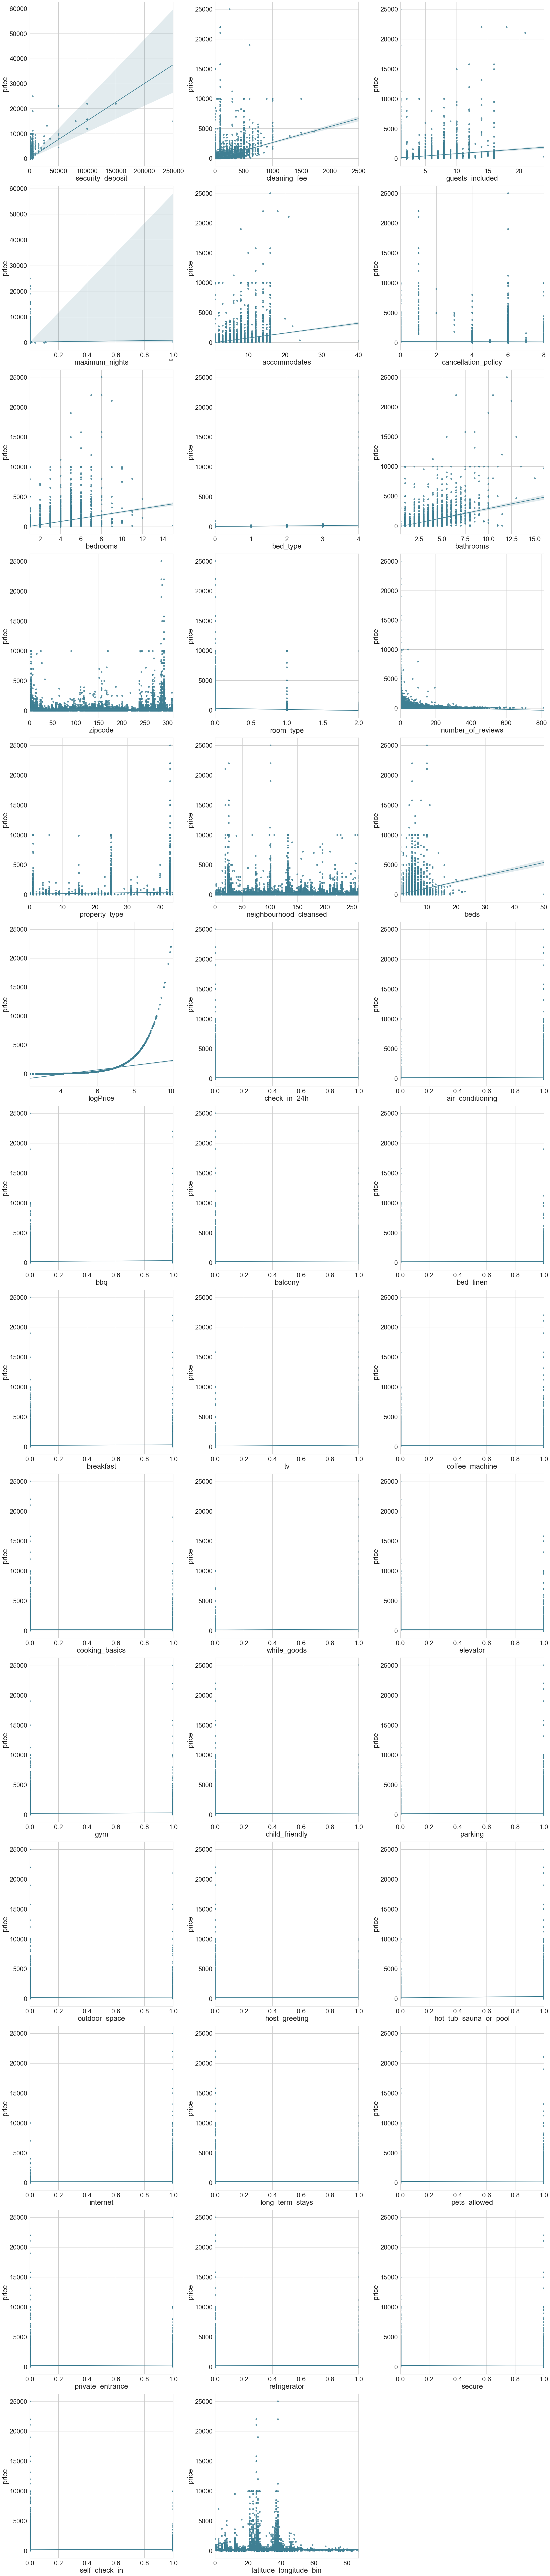

In [51]:
all_columns = df.columns.values.tolist()
all_columns.remove('price')

scatter_plot_in_sub_plot(df[all_columns], df['price'])

In [52]:
pd.set_option('display.max_columns', len(df.columns))
df.head()

price  security_deposit  cleaning_fee  guests_included  maximum_nights  \
0  122.0        500.000000         240.0                3             730   
1  168.0          0.000000         100.0                6              14   
2   79.0        480.000000          89.0                1             366   
3  140.0        453.166605         100.0                1             180   
4   80.0        100.000000          75.0                1             730   

   accommodates  cancellation_policy  bedrooms  bed_type  bathrooms  zipcode  \
0             6                    6       2.0         4        2.0      298   
1             6                    0       3.0         4        1.0      161   
2             1                    6       1.0         4        1.5      267   
3             1                    6       1.0         3        1.0       27   
4             2                    6       1.0         4        1.0       49   

   room_type  number_of_reviews  property_type  neighbourhood_cleansed  beds  \
0          0                  2             15                      53   3.0   
1          0                  6             25                      31   3.0   
2          1                 20              1                      99   1.0   
3          1                 18              1                     192   1.0   
4          0                  0              1                      22   1.0   

   logPrice  check_in_24h  air_conditioning  bbq  balcony  bed_linen  \
0  4.804021           1.0               1.0  0.0      0.0        0.0   
1  5.123964           1.0               1.0  1.0      1.0        0.0   
2  4.369448           1.0               1.0  0.0      1.0        1.0   
3  4.941642           0.0               0.0  0.0      0.0        0.0   
4  4.382027           0.0               1.0  0.0      0.0        0.0   

   breakfast   tv  coffee_machine  cooking_basics  white_goods  elevator  gym  \
0        0.0  1.0             0.0             0.0          1.0       1.0  1.0   
1        0.0  1.0             1.0             1.0          1.0       0.0  0.0   
2        1.0  0.0             1.0             1.0          1.0       1.0  1.0   
3        0.0  0.0             0.0             0.0          1.0       0.0  0.0   
4        0.0  1.0             0.0             0.0          1.0       0.0  0.0   

   child_friendly  parking  outdoor_space  host_greeting  \
0             1.0      1.0            0.0            0.0   
1             1.0      1.0            0.0            0.0   
2             0.0      1.0            0.0            1.0   
3             0.0      0.0            0.0            1.0   
4             0.0      1.0            0.0            0.0   

   hot_tub_sauna_or_pool  internet  long_term_stays  pets_allowed  \
0                    1.0       1.0              0.0           1.0   
1                    1.0       1.0              0.0           1.0   
2                    1.0       1.0              0.0           0.0   
3                    0.0       1.0              0.0           0.0   
4                    1.0       1.0              0.0           0.0   

   private_entrance  refrigerator  secure  self_check_in  \
0               0.0           0.0     1.0            0.0   
1               0.0           1.0     0.0            0.0   
2               0.0           1.0     1.0            0.0   
3               0.0           0.0     0.0            0.0   
4               0.0           0.0     0.0            0.0   

   latitude_longitude_bin  
0                      13  
1                      38  
2                      26  
3                      25  
4                       9

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38974 entries, 0 to 44619
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   38974 non-null  float64
 1   security_deposit        38974 non-null  float64
 2   cleaning_fee            38974 non-null  float64
 3   guests_included         38974 non-null  int64  
 4   maximum_nights          38974 non-null  int64  
 5   accommodates            38974 non-null  int64  
 6   cancellation_policy     38974 non-null  int64  
 7   bedrooms                38974 non-null  float64
 8   bed_type                38974 non-null  int64  
 9   bathrooms               38974 non-null  float64
 10  zipcode                 38974 non-null  int64  
 11  room_type               38974 non-null  int64  
 12  number_of_reviews       38974 non-null  int64  
 13  property_type           38974 non-null  int64  
 14  neighbourhood_cleansed  38974 non-null

In [54]:
df.isna().sum()

price                     0
security_deposit          0
cleaning_fee              0
guests_included           0
maximum_nights            0
accommodates              0
cancellation_policy       0
bedrooms                  0
bed_type                  0
bathrooms                 0
zipcode                   0
room_type                 0
number_of_reviews         0
property_type             0
neighbourhood_cleansed    0
beds                      0
logPrice                  0
check_in_24h              0
air_conditioning          0
bbq                       0
balcony                   0
bed_linen                 0
breakfast                 0
tv                        0
coffee_machine            0
cooking_basics            0
white_goods               0
elevator                  0
gym                       0
child_friendly            0
parking                   0
outdoor_space             0
host_greeting             0
hot_tub_sauna_or_pool     0
internet                  0
long_term_stays     

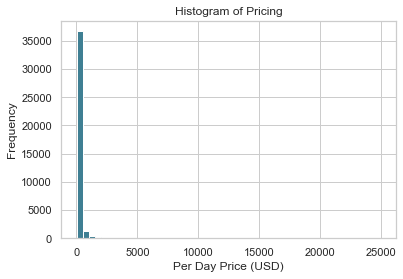

In [55]:
# visualize distribution of price (target variable)
plt.hist(df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Per Day Price (USD)")
plt.ylabel("Frequency")
plt.show()

The distribution for pricing is strongly skewed right. This again makes sense as a majority of the listings on Airbnb are single individual listings. Additionally, Airbnb does strongly cater to travelers who are looking for cheaper places to stay for short durations of time. There are of course listings with a high pricing as well; intuitively this matches with hosts that are listing a high value property such as an entire house. To compensate for the skewed right distribution, I will log the response variable and store the results in a new pandas column. Then I will run our baseline models on both the logged and original response and compare the results.

In [56]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

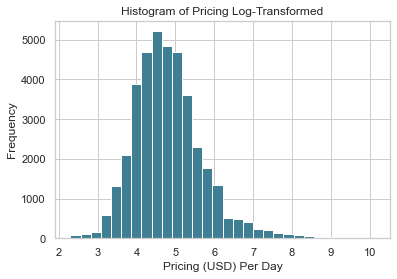

In [57]:
# visualize distribution of price (target variable)
plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [58]:
df.columns

Index(['price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'maximum_nights', 'accommodates', 'cancellation_policy', 'bedrooms',
       'bed_type', 'bathrooms', 'zipcode', 'room_type', 'number_of_reviews',
       'property_type', 'neighbourhood_cleansed', 'beds', 'logPrice',
       'check_in_24h', 'air_conditioning', 'bbq', 'balcony', 'bed_linen',
       'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
       'elevator', 'gym', 'child_friendly', 'parking', 'outdoor_space',
       'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
       'pets_allowed', 'private_entrance', 'refrigerator', 'secure',
       'self_check_in', 'latitude_longitude_bin', 'price_log'],
      dtype='object')

In [59]:
# Save dataframe for EDA

df.to_csv('./Data/data_cleansed.csv', index = False)